## Regression Dive

I'd like to be as thorough in my understanding as possible, so this my be slow but it will be very rigorous.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [26]:
%matplotlib inline

I was having trouble understanding the notation for linear regression. It turns out I was mixing up the concept of training the model vice using the model equation to make the prediction.

We see a typical linear regression model displayed as follows:

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

**This is the formula used to make the prediction. I was confusing the model formula with the training formula, which different.**

Each $x_n$ represents a feature of the data, for example, a feature of the housing data would be median income or bedrooms per household or proximity to water, etc. Each $\theta_n$ represents a weight that was trained using the training data to generate our linear regression model. He covers the normal equation in the next section. Each feature will have its own $\theta$ that was generated for that feature. 

We then put this into a "simpler" form:

$\hat{y} = \theta^{T}\cdot\textbf{x}$

This is a vectorized form of the equation before it. $\hat{y}$ still represents the prediction. $\theta$ is a column vector consisting of each feature's weight. **x** is a column vector of each feature. In order to get the same expression as the function above, we perform a dot product between $\theta$ and **x**. **In order to perform a dot product between these two vectors, we have to transpose one of them; thus, we transpose $\theta$.** (The first vector must have the same number of columns as the second vector's number of rows.)

We would then get the same expression as above. See! Not too hard! (Took me a while to figure that out since I'm still building my familiarity with vector notation.)

Aurelien covers the normal equation that outputs a $\theta$ that reduces the cost function. **I'll take this as a lookup to see how exactly this equation does this.**

$\hat{\theta} = (\textbf{X}^{T}\cdot\textbf{X})^{-1}\cdot\textbf{X}^{T}\cdot\textbf{y}$

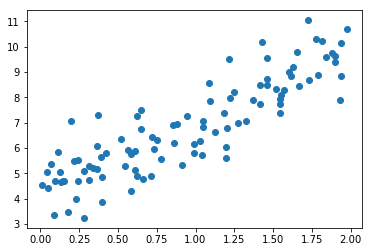

In [27]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'o')

In [28]:
X_b = np.c_[np.ones((100, 1)), X] # add 1 to each instance

In [29]:
print(np.linalg.inv(X_b.T.dot(X_b)))
print(X_b.T.dot(X_b))
print(1/94.03614868)

[[ 0.03523199 -0.02683222]
 [-0.02683222  0.02853394]]
[[ 100.           94.03614868]
 [  94.03614868  123.47395265]]
0.01063420837664191


Taking an inverse of a matrix is a little more complicated than I thought. I originally tried to take the inverse of X_b above, but I got an error. This is because only square matrices can be inversed. 

$A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}$

$A^{-1} = \cfrac{1}{ad - bc}\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}$

This gets a little more complicated with matrices of dimensions greater than 2 x 2. 

From my understanding through searches on the internet, this column of ones is required in order to deduce the y-intercept or the _bias_ of the data set.

In [30]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # expect different numbers than the book b

array([[ 4.21509616],
       [ 2.77011339]])

Aurelien mentions $\theta_0 = 3.865$ and $\theta_1 = 3.139$. I don't know what he's referring to here.

In [31]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

[0, 2, 0, 15]

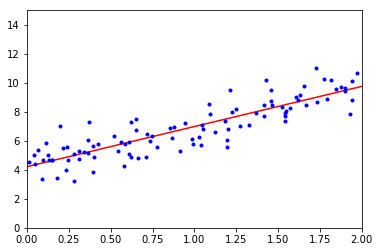

In [32]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

To clarify what we did here, we simply added two new data points at the extremes of our plot in order to draw the line. The 0 is equal to the y-intercept and 2 is at the far right of our plot. This is just to show the line!

Of course, sklearn provides these calculations in one convenient class.

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.21509616]), array([[ 2.77011339]]))

In [34]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

### Really important note

The operation $X^{T}\cdot X$'s computational compexity is about $O^{2.4-3}$ depending on the implementation. If you double the number of features, you multiply the computation by roughly $2^{2.4}$ to $2^{3}$. Expect this computation to get noticeably slower as the number of features grow. **BUT** it's linear when it comes to the number of instances. 

I went back to being confused because I couldn't understand where our prediction values and the theta were coming from. It seemed like you needed one to determine the other value. Sal explains a two dimensional, algebraic example here: https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/second-regression-example

What to glean from this is that we don't have to have a starting value from the start. We can get both m and b ($\theta_0$, $\theta_1$) from the values themselves. This is what the normal equation does, and, I think, this is a vectorized form of the mean squared error formula. The reason that we use gradient descent in the following secctions is that it is computationally expensive as the number of features and instances grow. Gradient descent helps us reach the value of $\theta$ faster.

## Gradient Descent

In order to find the $\theta$ that reduces the cost function as quickly as possible, we take the partial derivate of the mean squared error function with respect to $\theta$. Gradients point in the direction of steepest ascent, So this will constantly point us in the direction of the min. However, we have to adjust the steps we take as we descend, otherwise, we may skip over the minimum. Gradient descent is a constant battle of balancing # iterations vs the size of the steps. Lastly, we find the gradient descent by subtracting the descent form the last $\theta$.

$\theta^{next step} = \theta - \eta\nabla_{\theta}MSE(\theta)$

In [35]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
thetas = [] # I added a list of thetas in here because I was curious when the iterations I wasted. 
# Goes to show that maybe 1000 is a little much.

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    thetas.append(theta)

Above, we have an implementation of **batch gradient descent**. It performs the calculations on all the data at each step. This is fine if we require a more precise value for $\theta$ or if our data isn't excessively large. IF we need to reduce the iterations further, we can perform **stochastic gradient descent**. This takes a random sample of data at each step, so the MSE may vary, though it will consistently reduce in aggregate (until it gets close to the min, where it will still settle at random numbers near the min). It will not give an optimal min of $\theta$.

Additionally, the random nature of the SGD helps it break out of local minima, thus enabling it to find the globals.

Since it will never actually settle out at a minimum, we perform _simulated annealing_, by which we reduce the learning rate over time (it's put on a _learning schedule_).

In [36]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [37]:
theta

array([[ 4.18475289],
       [ 2.73036719]])

**Reminder**: I'm projecting x and y onto the 3D model I've commonly seen on the internet. This is confusing me. https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/ That image's axes are the y-intercept($\theta_0$), the slope($\theta_1$), and the error (MSE in this case). Do not confuse these axes with the data points in the dataset.

I'm almost there, but I still don't know what part the data itself is playing in finding the $\theta_0$ and $\theta_1$. I don't understand how subtracting a gradient from a given theta will allow us to arrive at our answers. 

Below is how to do this using sklearn.

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # ravel() flattens out y into a 1D array
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.2287996]), array([ 2.79011436]))

## Polynomial Regression

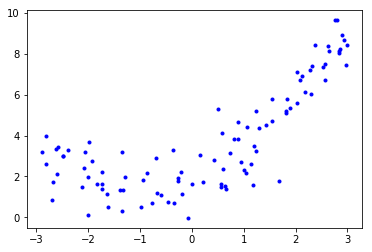

In [39]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([ 2.94407494])

In [41]:
X_poly[0]

array([ 2.94407494,  8.66757727])

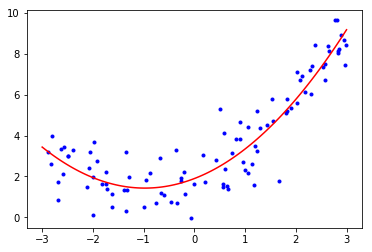

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # Generates 100 numbers evenly spaced between -3 and 3, inclusive
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-')

I think the lesson to glean from this is that you should look at your data and determine if a polynomial function would better fit than a linear model. sklearn provides the tools to do this.